In [ ]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import sqrt as Sqrt
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 17
# Алгебра
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [ ]:
x, y, z = symbols('x y z')
A = Matrix([[4, -12, 4 * Sqrt(S(3))], [-12, -7, 5 * Sqrt(S(3))], 
            [4 * Sqrt(S(3)), 5 * Sqrt(S(3)), 3]])
b = Matrix((0, 0, 0)).T
c = -4
X = Matrix((x, y, z))
u = X.T * A * X
v = b * X
display(A, u, v)

Matrix([
[        4,       -12, 4*sqrt(3)],
[      -12,        -7, 5*sqrt(3)],
[4*sqrt(3), 5*sqrt(3),         3]])

Matrix([[x*(4*x - 12*y + 4*sqrt(3)*z) + y*(-12*x - 7*y + 5*sqrt(3)*z) + z*(4*sqrt(3)*x + 5*sqrt(3)*y + 3*z)]])

Matrix([[0]])

In [ ]:
eq1 = simplify(expand(u[0] + 2*v[0] + c))
display(Eq(eq1, 0))
display(A, Eq(simplify(expand(X.T*A*X))[0] - 4, 0))

Eq(4*x**2 - 24*x*y + 8*sqrt(3)*x*z - 7*y**2 + 10*sqrt(3)*y*z + 3*z**2 - 4, 0)

Matrix([
[        4,       -12, 4*sqrt(3)],
[      -12,        -7, 5*sqrt(3)],
[4*sqrt(3), 5*sqrt(3),         3]])

Eq(4*x**2 - 24*x*y + 8*sqrt(3)*x*z - 7*y**2 + 10*sqrt(3)*y*z + 3*z**2 - 4, 0)

In [ ]:
P = Matrix([])
for item in A.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized())
A2 = P.T * A * P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix([x1, y1, z1])
q_f2 = simplify(expand(X_new.T * A2 * X_new))[0]
display(A2, q_f2)

Matrix([
[-20, 0,  0],
[  0, 8,  0],
[  0, 0, 12]])

-20*x1**2 + 8*y1**2 + 12*z1**2

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

In [ ]:
A4 = Matrix([[24, -2 * Sqrt(2), -2 * Sqrt(2)], [-2 * Sqrt(2), 18, 6], 
             [-2 * Sqrt(2), 6, 18]])
X4 = Matrix([x, y, z])
b = Matrix([0, 0, 0])
u = simplify(expand(X4.T * A4 * X4))[0] + 2 * (b.T * X4)[0]
display(u)

24*x**2 - 4*sqrt(2)*x*y - 4*sqrt(2)*x*z + 18*y**2 + 12*y*z + 18*z**2

In [ ]:
P = Matrix()
for item in A4.eigenvects():
  degree = item[1]
  for i in range(degree):
    P = P.row_join(item[2][i].normalized())
A4_new = P.T * A4 * P
x1, y1, z1 = symbols('x1 y1 z1')
X4_new = Matrix((x1, y1, z1))
q_f_new = simplify(expand(X4_new.T * A4_new * X4_new))[0]
display(A4_new, q_f_new)

Matrix([
[12,  0,  0],
[ 0, 20,  0],
[ 0,  0, 28]])

12*x1**2 + 20*y1**2 + 28*z1**2

In [ ]:
b_new = P.T * b
display(b_new)

Matrix([
[0],
[0],
[0]])

In [ ]:
u_new = q_f_new + 2 * (b_new.T*X4_new)[0]
display(u_new)

12*x1**2 + 20*y1**2 + 28*z1**2

In [ ]:
c_new = -4
for i in range(3):
    c_new -= b_new[i] ** 2 / (A4_new[i, i])
display(c_new)

-4

In [ ]:
b_last = zeros(3, 1)
x2, y2, z2 = symbols('x2 y2 z2')
X4_last = Matrix((x2, y2, z2))
eq4 = Eq((X4_last.T * A4_new * X4_last)[0] + 2 * (b_last.T * X4_last)[0] 
         + c_new, 0)
display(eq4)

Eq(12*x2**2 + 20*y2**2 + 28*z2**2 - 4, 0)

-sqrt(-15*y2**2 - 21*z2**2 + 3)/3

sqrt(-15*y2**2 - 21*z2**2 + 3)/3

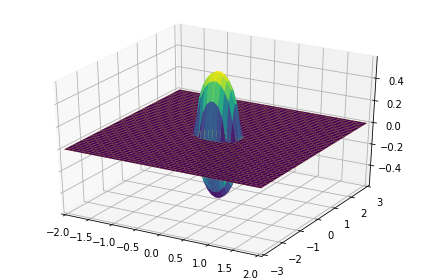

In [ ]:
X = solve(eq4, x2)
display(*X)
plot3d(*X, (y2, -2, 2), (z2, -3, 3))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

In [ ]:
A4 = Matrix([[1, 0, 0], 
             [0, 1, 0], 
             [0, 0, 0]])
X = Matrix([x, y, z])
b = Matrix([1, -2, 1])
display(A, Eq(simplify(expand(X.T * A * X))[0] - 4, 0))

Matrix([
[        4,       -12, 4*sqrt(3)],
[      -12,        -7, 5*sqrt(3)],
[4*sqrt(3), 5*sqrt(3),         3]])

Eq(4*x**2 - 24*x*y + 8*sqrt(3)*x*z - 7*y**2 + 10*sqrt(3)*y*z + 3*z**2 - 4, 0)

In [ ]:
P = Matrix()
for item in A.eigenvects():
  degree = item[1]
  for i in range(degree):
    P = P.row_join(item[2][i].normalized())
A2 = P.T * A * P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix([x1, y1, z1])
q_f2 = simplify(expand(X_new.T * A2 * X_new))[0]
display(A2, q_f2)

Matrix([
[-20, 0,  0],
[  0, 8,  0],
[  0, 0, 12]])

-20*x1**2 + 8*y1**2 + 12*z1**2

In [ ]:
display(Eq(q_f2, 4))

Eq(-20*x1**2 + 8*y1**2 + 12*z1**2, 4)

In [ ]:
eq2 = Eq(q_f2 / 4, 1)
display(eq2)

Eq(-5*x1**2 + 2*y1**2 + 3*z1**2, 1)

-sqrt(15*x1**2 - 6*y1**2 + 3)/3

sqrt(15*x1**2 - 6*y1**2 + 3)/3

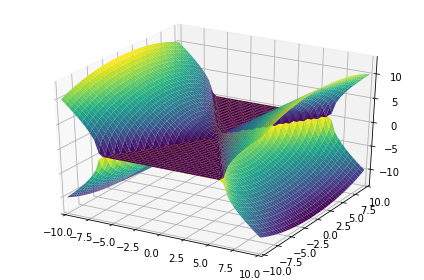

In [ ]:
Z = solve(eq2, z1)
display(*Z)
plot3d(*Z, (x1, -10, 10), (y1, -10, 10))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.
u = 25x^2 + 10sqrt(3)xy + 35y^2 + 56z^2

$$u = 13x^2 − 10\sqrt3 xy + 23y^2 + 48z^2$$

In [ ]:
A4 = Matrix([[13, -5 * Sqrt(S(3)), 0],
             [-5 * Sqrt(S(3)), 23, 0],
             [0, 0, 48]])
X4 = Matrix([x, y, z])
b = Matrix([0, 0, 0])
u = simplify(expand(X4.T * A4 * X4))[0] + 2 * (b.T * X4)[0]
display(u)

13*x**2 - 10*sqrt(3)*x*y + 23*y**2 + 48*z**2

In [ ]:
P = Matrix()
for item in A4.eigenvects():
  degree = item[1]
  for i in range(degree):
    P = P.row_join(item[2][i].normalized())
A4_new = P.T * A4 * P
x1, y1, z1 = symbols('x1 y1 z1')
X4_new = Matrix((x1, y1, z1))
q_f_new = simplify(expand(X4_new.T * A4_new * X4_new))[0]
display(A4_new, q_f_new)

Matrix([
[8,  0,  0],
[0, 28,  0],
[0,  0, 48]])

8*x1**2 + 28*y1**2 + 48*z1**2

In [ ]:
b_new = P.T * b
display(b_new)

Matrix([
[0],
[0],
[0]])

In [ ]:
u_new = q_f_new + 2 * (b_new.T*X4_new)[0]
display(u_new)

8*x1**2 + 28*y1**2 + 48*z1**2

In [ ]:
c_new = -4
for i in range(3):
    c_new -= b_new[i] ** 2 / (A4_new[i, i])
display(c_new)

-4

In [ ]:
b_last = zeros(3, 1)
x2, y2, z2 = symbols('x2 y2 z2')
X4_last = Matrix((x2, y2, z2))
eq4 = Eq((X4_last.T * A4_new * X4_last)[0] + 2 * (b_last.T * X4_last)[0] 
         + c_new, 0)
display(eq4)

Eq(8*x2**2 + 28*y2**2 + 48*z2**2 - 4, 0)

-sqrt(-14*y2**2 - 24*z2**2 + 2)/2

sqrt(-14*y2**2 - 24*z2**2 + 2)/2

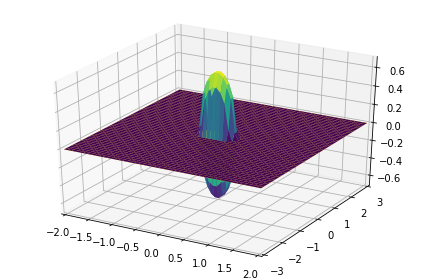

In [ ]:
X = solve(eq4, x2)
display(*X)
plot3d(*X, (y2, -2, 2), (z2, -3, 3))